In [39]:
import numpy as np
import h5py
import tensorflow as tf
from tf_utils import *
import math
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(1)

In [3]:
y_hat = tf.constant(36,name="y_hat")
y = tf.constant(39,name="y")

loss = tf.Variable((y_hat-y)**2,name="loss")

init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    print(session.run(loss))

9


In [6]:
a = tf.constant(5)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [5]:
sess = tf.Session()
sess.run(a)

5

In [7]:
a

<tf.Tensor 'Const_1:0' shape=() dtype=int32>

In [8]:
sess.run(c)

50

so in tensorflow we need to ** initilize variables, create session and run opertions inside sessions** 

In [9]:
x = tf.placeholder(tf.int64)
print(sess.run(x*4,feed_dict={x:5}))
sess.close()

20


### Linear functions

In [16]:
def linear_function():
    np.random.seed(1)
#     W = tf.constant(np.random.randn(4,3))
#     X = tf.constant(np.random.randn(3,1))
#     b = tf.constant(np.random.randn(4,1))
    X = np.random.randn(3, 1)
    W = np.random.randn(4, 3)
    b = np.random.randn(4, 1)
    linear = tf.add(tf.matmul(W,X),b)
    sess = tf.Session();
    output = sess.run(linear)
    sess.close()
    return output

In [15]:
linear_function()

array([[-1.98748544],
       [-2.76826248],
       [-0.78635415],
       [-2.77463846]])

In [17]:
linear_function()

array([[-2.15657382],
       [ 2.95891446],
       [-1.08926781],
       [-0.84538042]])

### sigmoid

In [19]:
def sigmoid(v):
    x = tf.placeholder(tf.float64)
    z = tf.sigmoid(x)
    with tf.Session() as sess:
        result=sess.run(z,feed_dict={x:v})
        
    return result

In [21]:
print(sigmoid(1))
print(sigmoid(0))

0.7310585786300049
0.5


### Computing the cost

In [24]:
def cost(logit,labels):
    z = tf.placeholder(tf.float32)
    y = tf.placeholder(tf.float32)
    
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels=y)
    
    with tf.Session() as sess:
        result = sess.run(cost,feed_dict={z:logit,y:labels})
    
    return result

In [25]:
logits = sigmoid(np.array([0.2, 0.4, 0.7, 0.9]))
cost(logits, np.array([0, 0, 1, 1]))

array([1.0053873 , 1.0366408 , 0.41385433, 0.39956617], dtype=float32)

### one hot encoding

In [33]:
def one_hot_matrix(labels,C):
    C = tf.constant(C)
    one_hot_matrix = tf.one_hot(indices=labels,depth=C,axis=0)
    with tf.Session() as sess:
        result = sess.run(one_hot_matrix)
    return result

In [34]:
labels = np.array([1,2,3,0,1,2])
one_hot_matrix(labels,10)

array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

### Initialize with zeros and ones

In [35]:
def ones(shape):
    var = tf.ones(shape=shape)
    with tf.Session() as sess:
        result = sess.run(var)
    return result

In [36]:
ones(5)

array([1., 1., 1., 1., 1.], dtype=float32)

## Create NN in tensorflow

In [37]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Text(0.5,1,'This is market as : [4]')

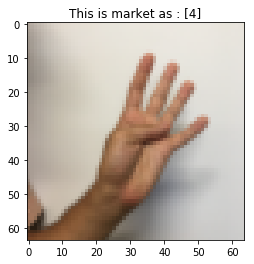

In [46]:
index = 5
plt.imshow(X_train_orig[index])
plt.title("This is market as : "+str(Y_train_orig[:,index]))

In [47]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

X_train = X_train_flatten / 255.
X_test = X_test_flatten / 255.

Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print("number of training examples = " + str(X_train.shape[1]))
print("number of test examples = " + str(X_test.shape[1]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


### create placeholders

In [63]:
def create_placeholders(n_x,n_y):
    X = tf.placeholder(tf.float32,shape=[n_x,None],name="X")
    Y = tf.placeholder(tf.float32,shape=[n_y,None],name="Y")
    
    return X,Y

In [64]:
create_placeholders(12288, 6)

(<tf.Tensor 'X_1:0' shape=(12288, ?) dtype=float32>,
 <tf.Tensor 'Y_1:0' shape=(6, ?) dtype=float32>)

In [65]:
def initialize_parameters():
    tf.set_random_seed(1)
    
    W1 = tf.get_variable("W1",shape=[25,12288],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1",shape=[25,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer = tf.zeros_initializer())
    
    parameters = {
        "W1":W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3
    }
    return parameters

In [67]:
def forward_propagation(X,parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    
    return Z3

In [68]:
tf.reset_default_graph()

with tf.Session() as sess:
    X,Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    print("Z3= "+str(Z3))

Z3= Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [69]:
def compute_cost(Z3,Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    return cost

In [70]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [77]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 3
    (n_x,m)=X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    
    X,Y = create_placeholders(n_x,n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    cost = compute_cost(Z3,Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            epoch_cost = 0.
            num_minibatches = int(m/minibatch_size)
            seed = seed+1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
        
            for minibatch in minibatches:
                (minibatch_X,minibatch_Y) = minibatch
                _,minibatch_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
                epoch_cost += minibatch_cost/num_minibatches
                
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
                
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        parameters = sess.run(parameters)
        correct_predictions = tf.equal(tf.argmax(Z3),tf.argmax(Y))
        accuracy = tf.reduce_mean(tf.cast(correct_predictions,"float"))
        
        print("Training accuracy: ",accuracy.eval({X:X_train,Y:Y_train}))
        print("Test accuracy: ",accuracy.eval({X:X_test,Y:Y_test}))
        
        return parameters

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.016458
Cost after epoch 200: 0.733102
Cost after epoch 300: 0.572938
Cost after epoch 400: 0.468799
Cost after epoch 500: 0.380979
Cost after epoch 600: 0.313819
Cost after epoch 700: 0.254258
Cost after epoch 800: 0.203795
Cost after epoch 900: 0.166410
Cost after epoch 1000: 0.141497
Cost after epoch 1100: 0.107579
Cost after epoch 1200: 0.086229
Cost after epoch 1300: 0.059415
Cost after epoch 1400: 0.052237


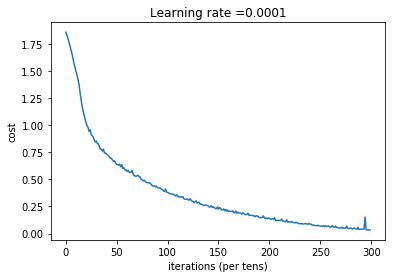

Training accuracy:  0.9990741
Test accuracy:  0.71666664


In [78]:
parameters = model(X_train,Y_train,X_test,Y_test)